In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [19]:
df1=pd.read_csv("../data/business_data.csv")
df2=pd.read_csv('../data/education_data.csv')
df3=pd.read_csv('../data/entertainment_data.csv')
df4=pd.read_csv('../data/sports_data.csv')
df5=pd.read_csv('../data/technology_data.csv')

# Data Pre-Processing

In [20]:
# joining all the dataframes together
dfs=[df1,df2,df3,df4,df5]
df = pd.concat(dfs)

In [21]:
df.to_csv('../data/master_data.csv')

In [22]:
# Shuffling the columns for randomness
from sklearn.utils import shuffle
df = shuffle(df)

In [23]:
df.head()

headlines  \
1474  DU Admissions 2023: PG schedule out, first all...   
595   Anish Bhanwala’s breakthrough: Young shooter w...   
330   2024 promises more of 2023: Ronaldo-Messi’s ri...   
796   ‘Ahh… Not really, at least before the series e...   
860   Mukesh Ambani overtakes Gautam Adani to become...   

                                            description  \
1474  DU Admissions 2023: Interested students can re...   
595   20-year-old Indian got the better of Rio Olymp...   
330   Among the half-inevitabilities: England’s wait...   
796   It is a special feeling when your family watch...   
860   Gautam Adani's fortune fell by 57 per cent to ...   

                                                content  \
1474  DU Admissions 2023: The Delhi University today...   
595   After winning the bronze medal in the men’s 25...   
330   Some footballing inevitabilities of the New Ye...   
796   Playing his 100th Test, Cheteshwar Pujara on S...   
860   Reliance Industries chairman Mukesh Ambani ove...   

                                                    url   category  
1474  https://indianexpress.com/article/education/du...  education  
595   https://indianexpress.com/article/sports/anish...     sports  
330   https://indianexpress.com/article/sports/footb...     sports  
796   https://indianexpress.com/article/sports/crick...     sports  
860   https://indianexpress.com/article/business/eco...   business

In [24]:
# resetting the index
df.reset_index(inplace=True)

In [25]:
df.head()

index                                          headlines  \
0   1474  DU Admissions 2023: PG schedule out, first all...   
1    595  Anish Bhanwala’s breakthrough: Young shooter w...   
2    330  2024 promises more of 2023: Ronaldo-Messi’s ri...   
3    796  ‘Ahh… Not really, at least before the series e...   
4    860  Mukesh Ambani overtakes Gautam Adani to become...   

                                         description  \
0  DU Admissions 2023: Interested students can re...   
1  20-year-old Indian got the better of Rio Olymp...   
2  Among the half-inevitabilities: England’s wait...   
3  It is a special feeling when your family watch...   
4  Gautam Adani's fortune fell by 57 per cent to ...   

                                             content  \
0  DU Admissions 2023: The Delhi University today...   
1  After winning the bronze medal in the men’s 25...   
2  Some footballing inevitabilities of the New Ye...   
3  Playing his 100th Test, Cheteshwar Pujara on S...   
4  Reliance Industries chairman Mukesh Ambani ove...   

                                                 url   category  
0  https://indianexpress.com/article/education/du...  education  
1  https://indianexpress.com/article/sports/anish...     sports  
2  https://indianexpress.com/article/sports/footb...     sports  
3  https://indianexpress.com/article/sports/crick...     sports  
4  https://indianexpress.com/article/business/eco...   business

In [26]:
df.shape

(10000, 6)

In [27]:
# removing the useless columns
df.drop(columns=["index","url","headlines","description"],inplace=True)

In [28]:
df.sample(5)

content       category
7955  The Indian Space Research Organisation (ISRO) ...     technology
6730  Setting up alarms on our phones is something m...     technology
7821  OpenAI’s large language models so far have bee...     technology
8620  Salaar: Part 1 – Ceasefire, starring Prabhas a...  entertainment
5885  Tech News Today in India: Samsung might be gea...     technology

In [30]:
df.to_csv('../data/display_data.csv',index=False)

### Exploratory Data Analysis

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [13]:
all_headlines = ' '.join(df['content'])

In [14]:
words = word_tokenize(all_headlines)

In [15]:
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

In [16]:
word_freq = pd.Series(filtered_words).value_counts()

In [17]:
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(word_freq)

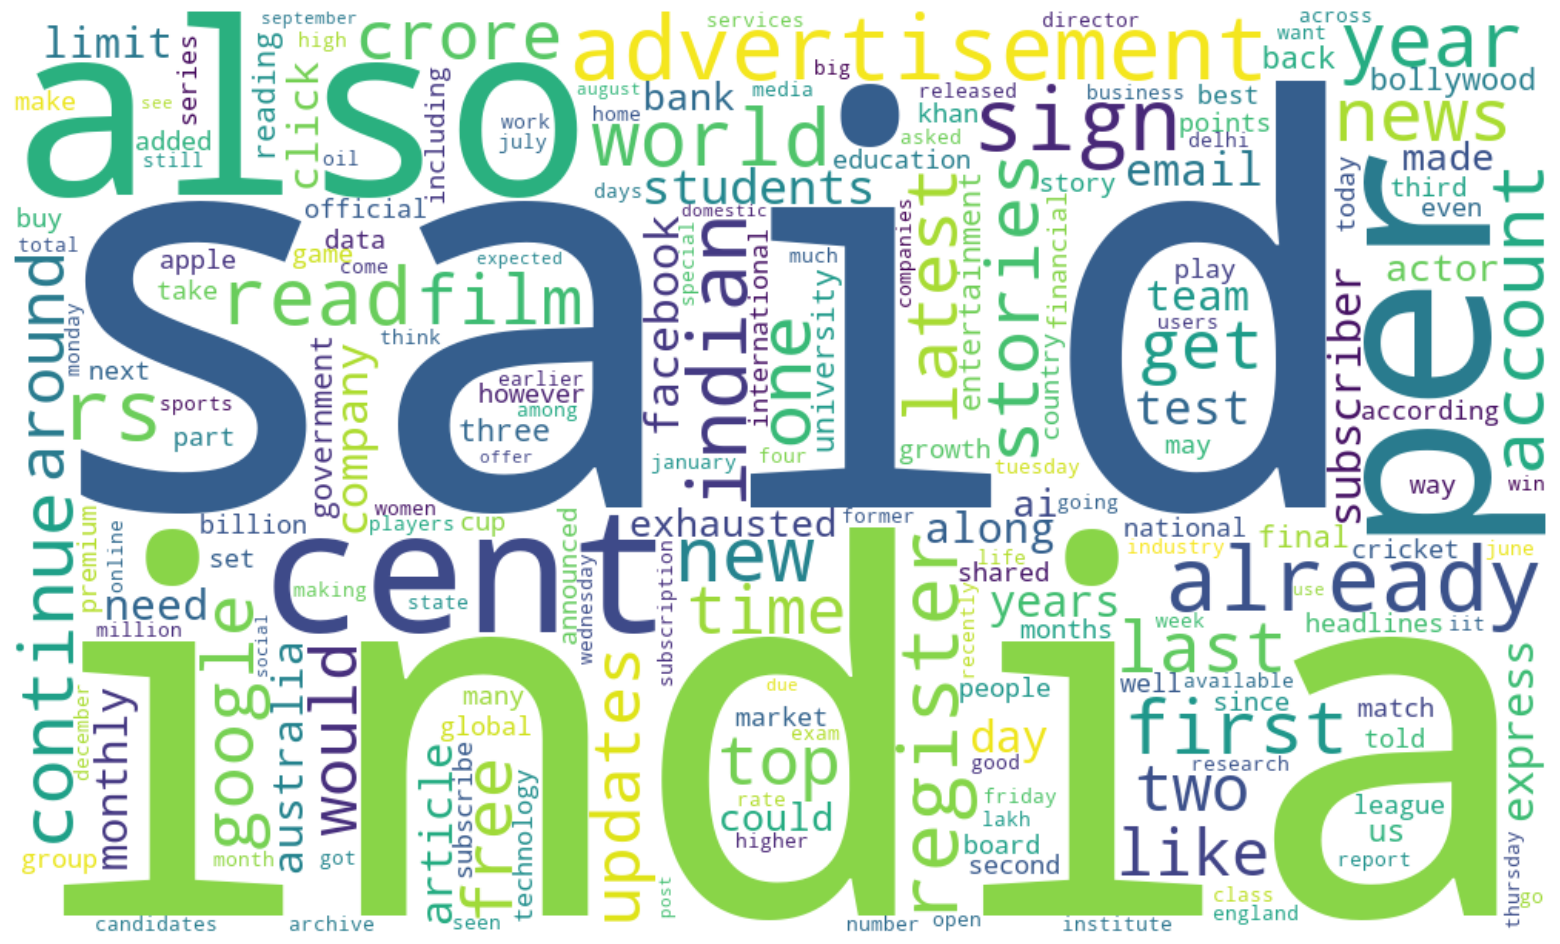

In [17]:
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
def generate_wordcloud_for_category(category):
    category_headlines = ' '.join(df[df['category'] == category]['content'])
    words = word_tokenize(category_headlines)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    word_freq = pd.Series(filtered_words).value_counts()

    wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(category.capitalize() + ' Word Cloud')
    plt.axis('off')
    plt.show()

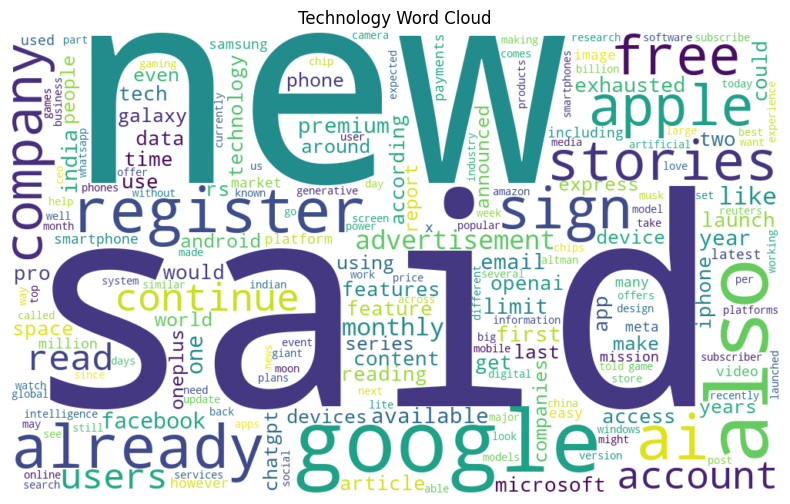

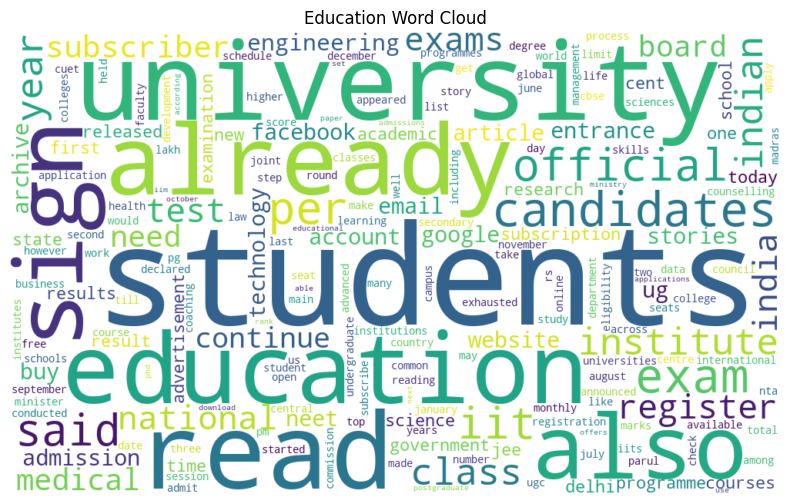

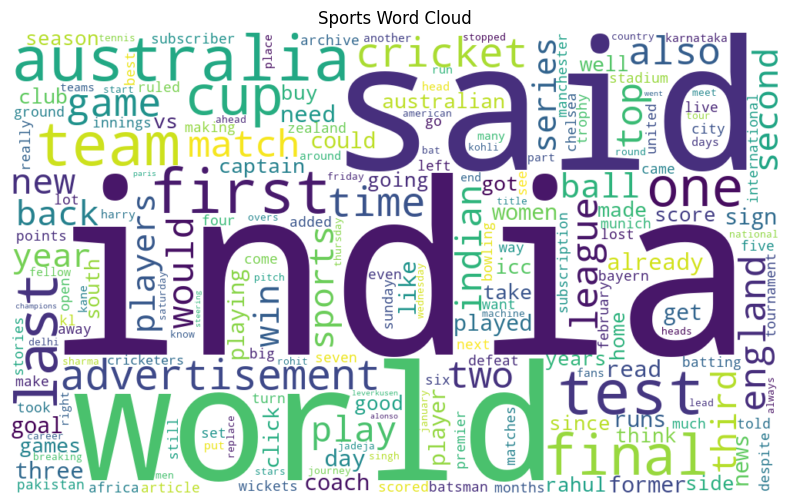

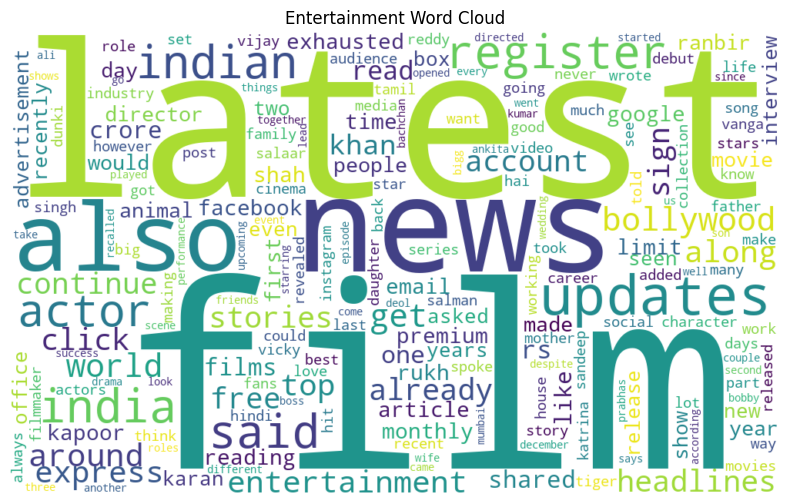

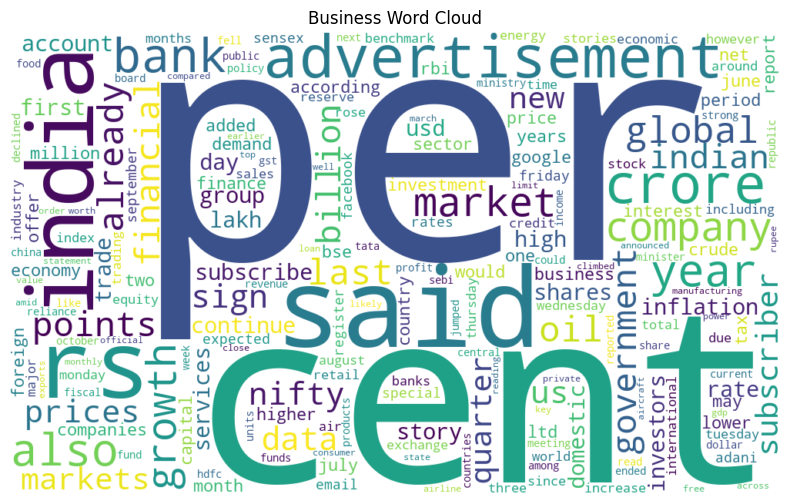

In [19]:
# Generate word cloud for each category
unique_categories = df['category'].unique()
for category in unique_categories:
    generate_wordcloud_for_category(category)

## Bigram word clouds

In [20]:
from nltk import bigrams
bigrams_list = list(bigrams(filtered_words))

bigram_strings = [' '.join(bigram) for bigram in bigrams_list]
bigram_freq = pd.Series(bigram_strings).value_counts()

bigram_wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(bigram_freq)

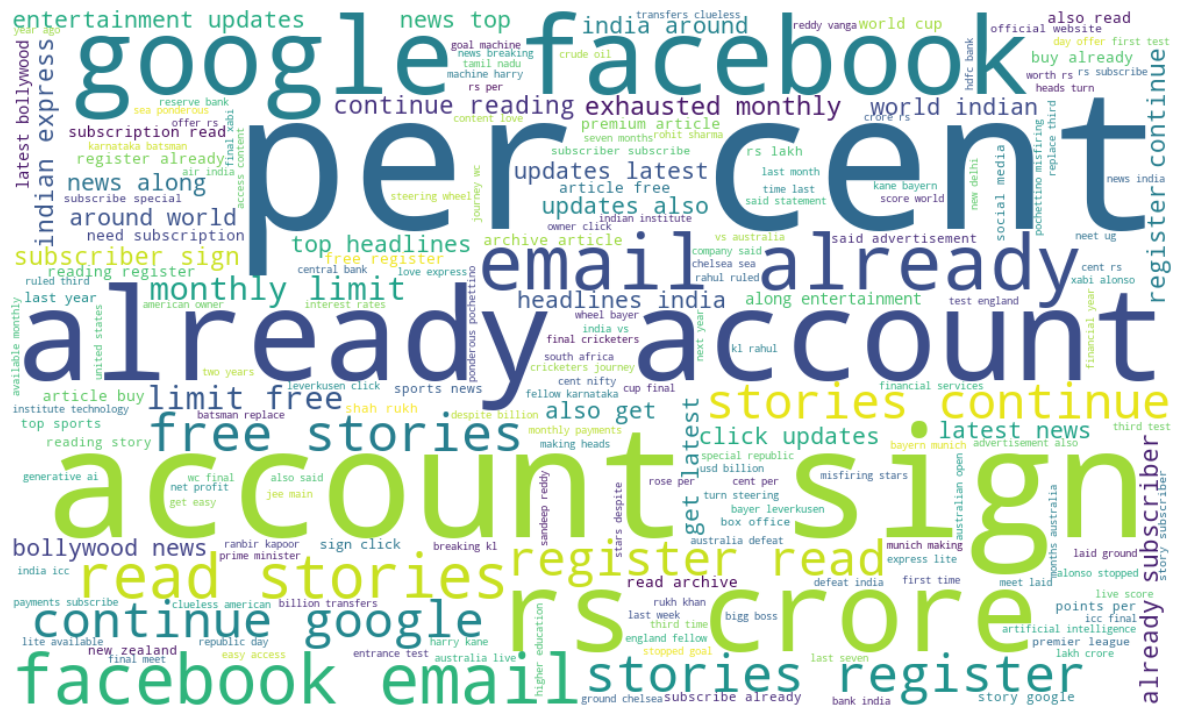

In [21]:
plt.figure(figsize=(15, 10))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
def generate_bigram_wordcloud(category):
    category_df = df[df['category'] == category]
    all_headlines = ' '.join(category_df['content'])
    words = word_tokenize(all_headlines)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    bigrams_list = list(bigrams(filtered_words))

    bigram_strings = [' '.join(bigram) for bigram in bigrams_list]
    bigram_freq = pd.Series(bigram_strings).value_counts()

    bigram_wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(bigram_freq)

    plt.figure(figsize=(15, 10))
    plt.imshow(bigram_wordcloud, interpolation='bilinear')
    plt.title(f'Bigram Word Cloud for {category}')
    plt.axis('off')
    plt.show()

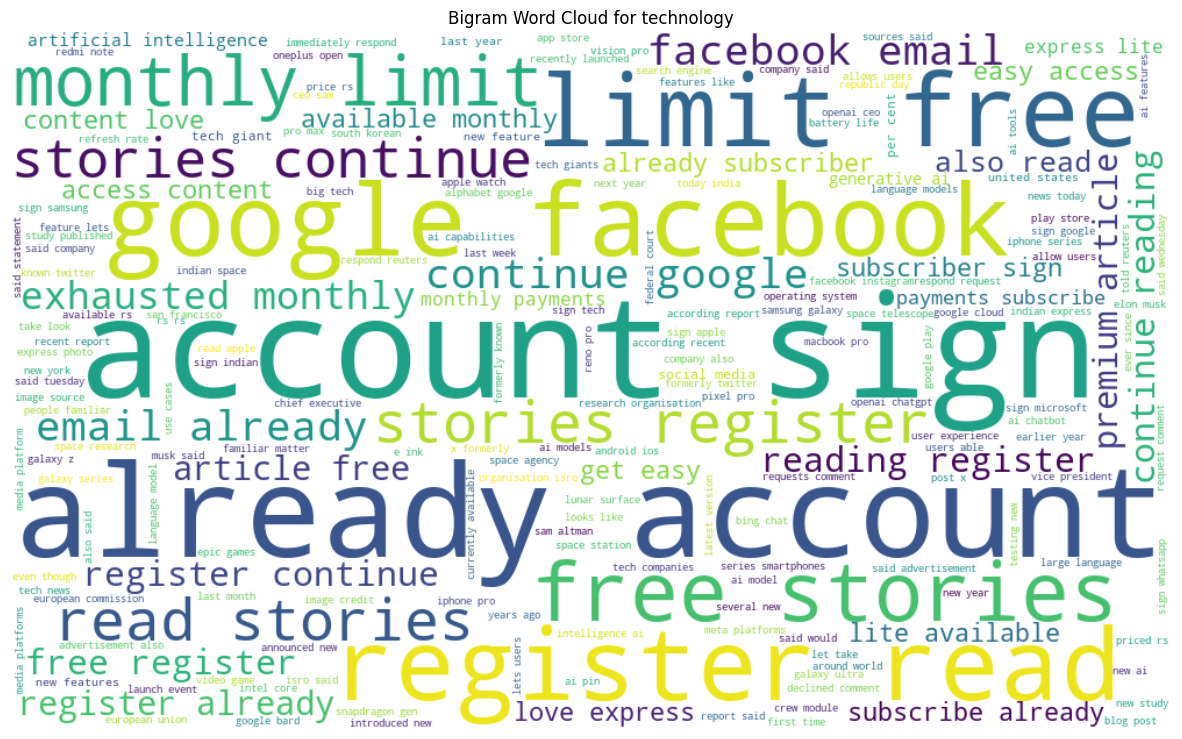

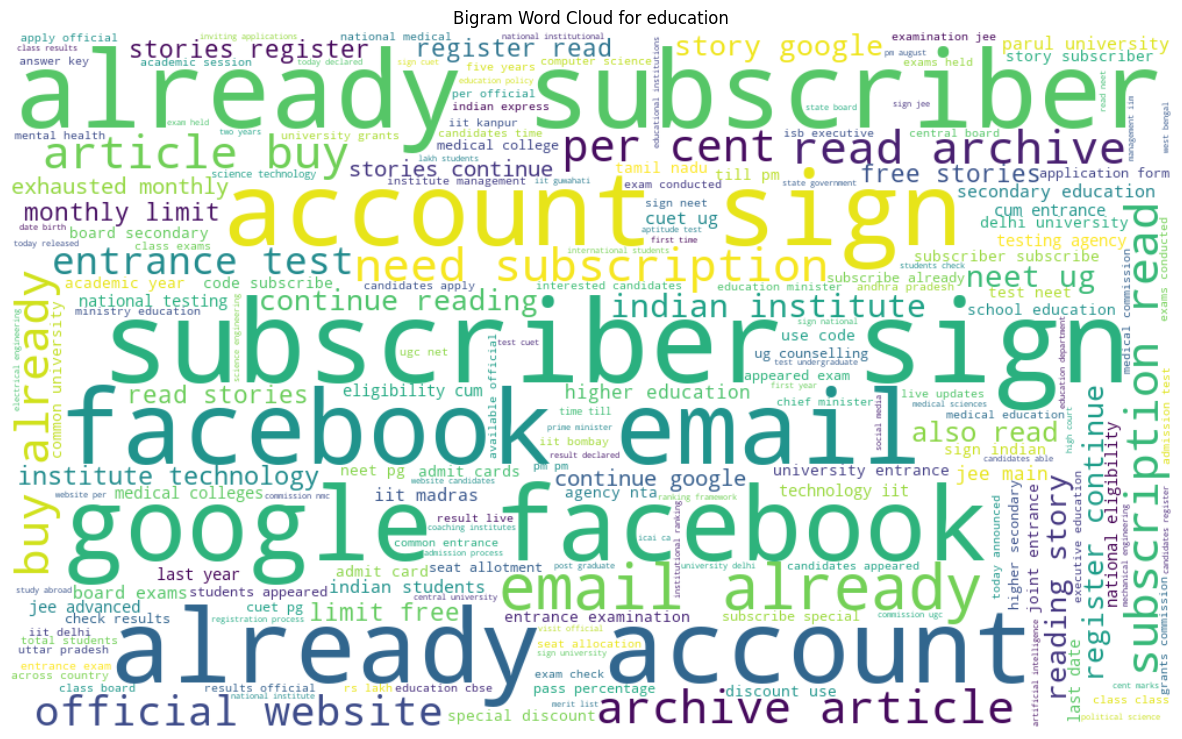

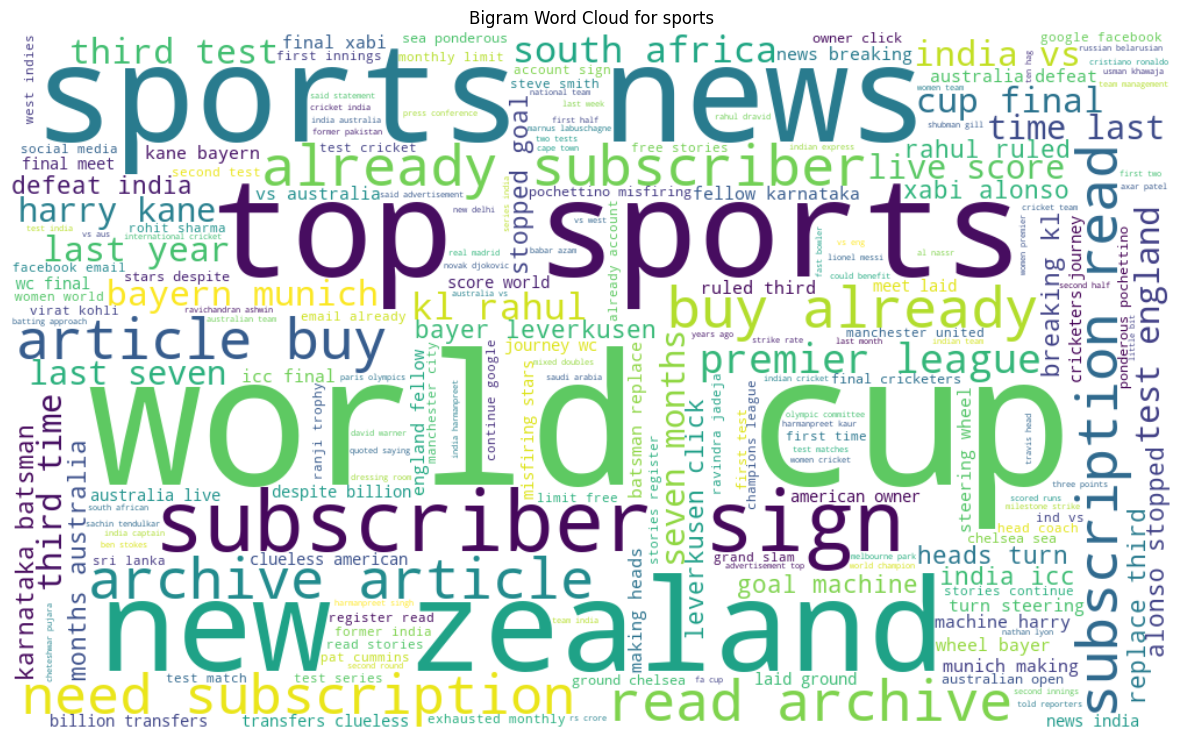

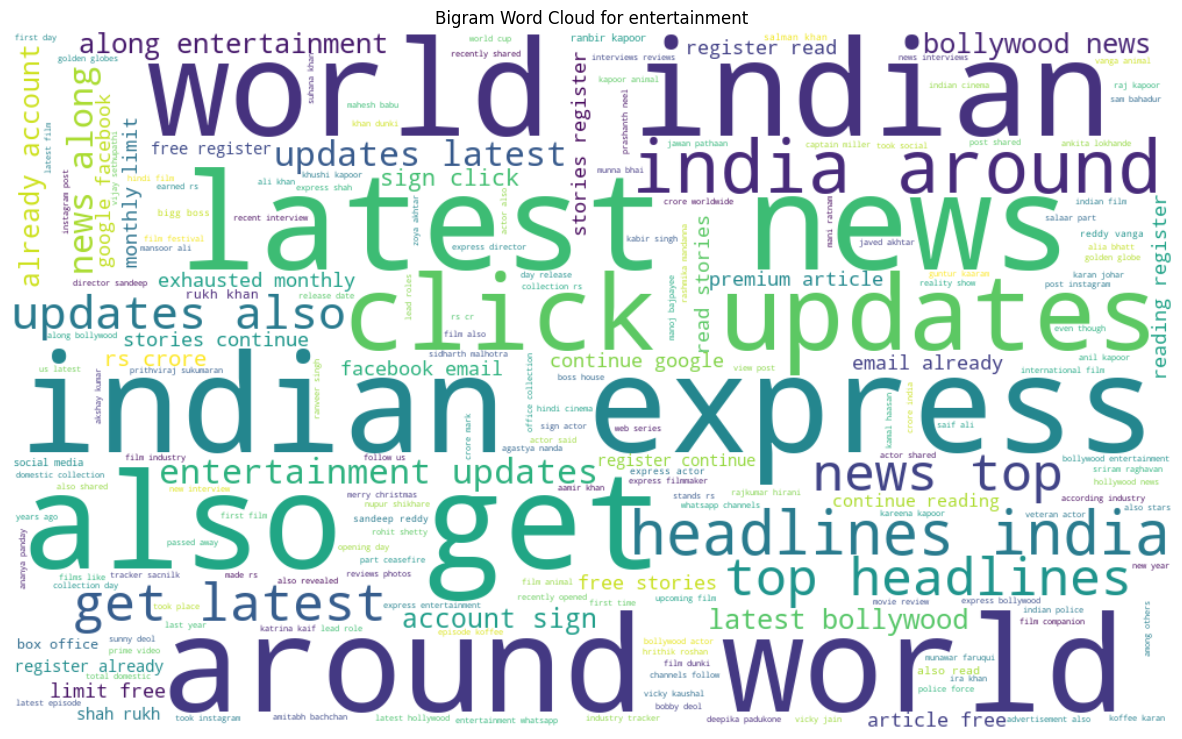

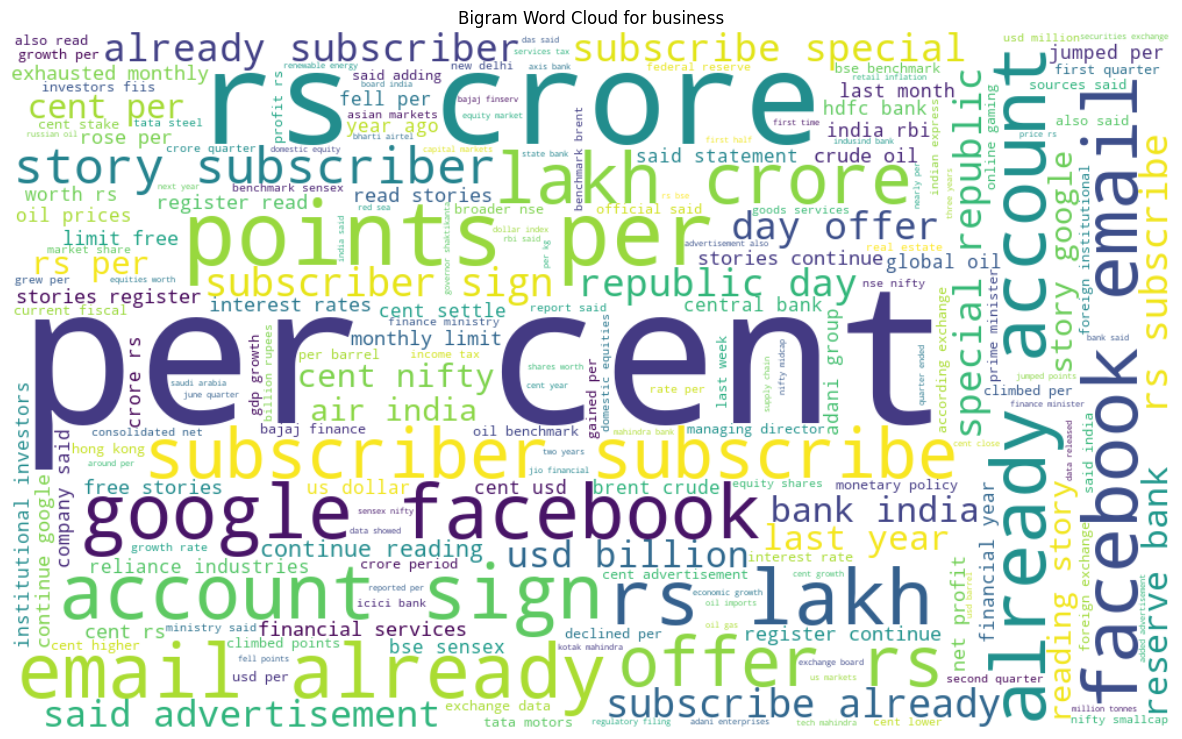

In [23]:
categories = df['category'].unique()
for category in categories:
    generate_bigram_wordcloud(category)

In [5]:
df = pd.read_csv("../data/display_data.csv")

In [6]:
from collections import Counter
def generate_bar_chart(category_group):
    all_content = ' '.join(category_group['content'])
    words = word_tokenize(all_content)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    word_counts = Counter(filtered_words)
    common_words = word_counts.most_common(15)  # Get top 10 most common words
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title(f"Top 15 words in {category_group['category'].iloc[0]} category")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

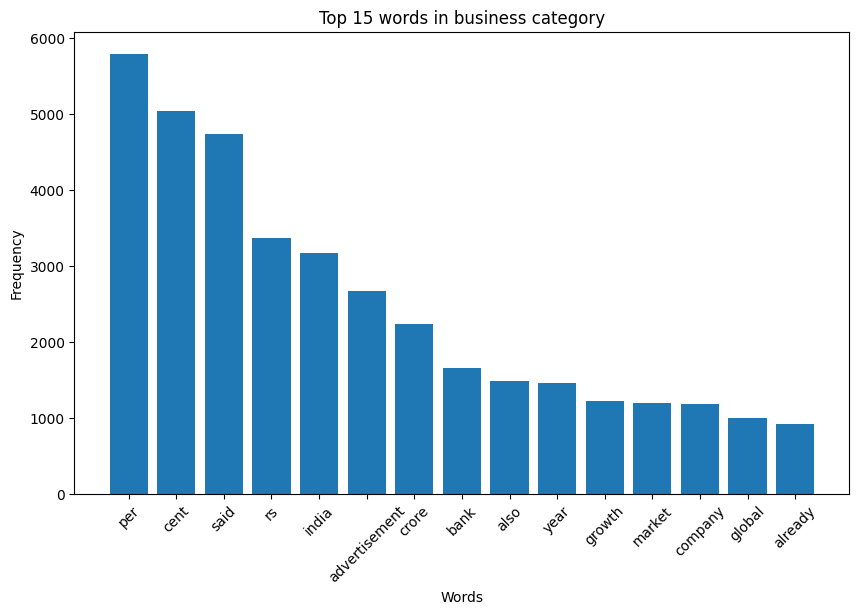

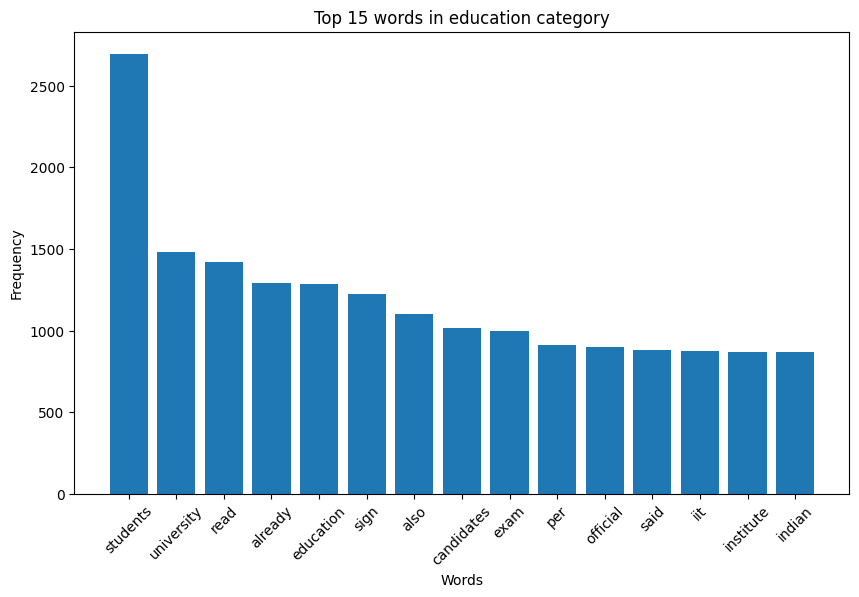

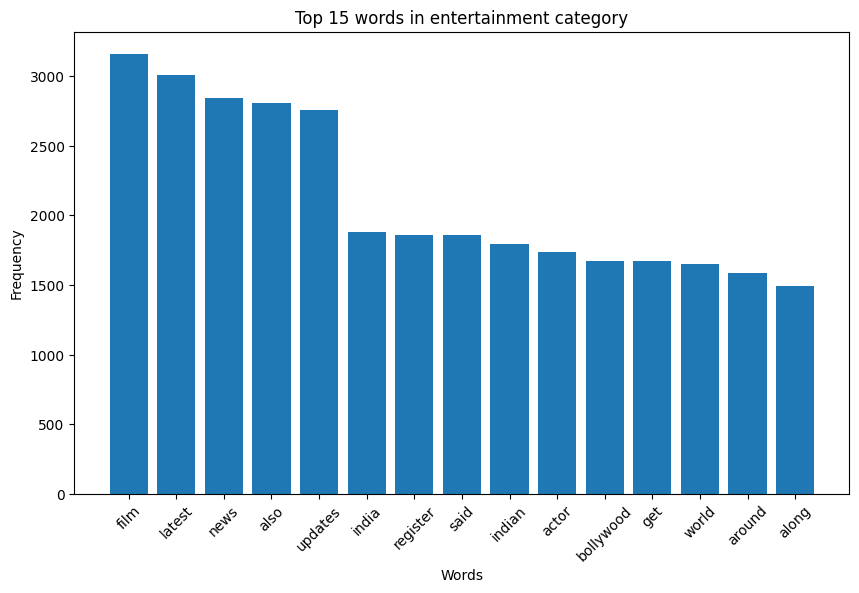

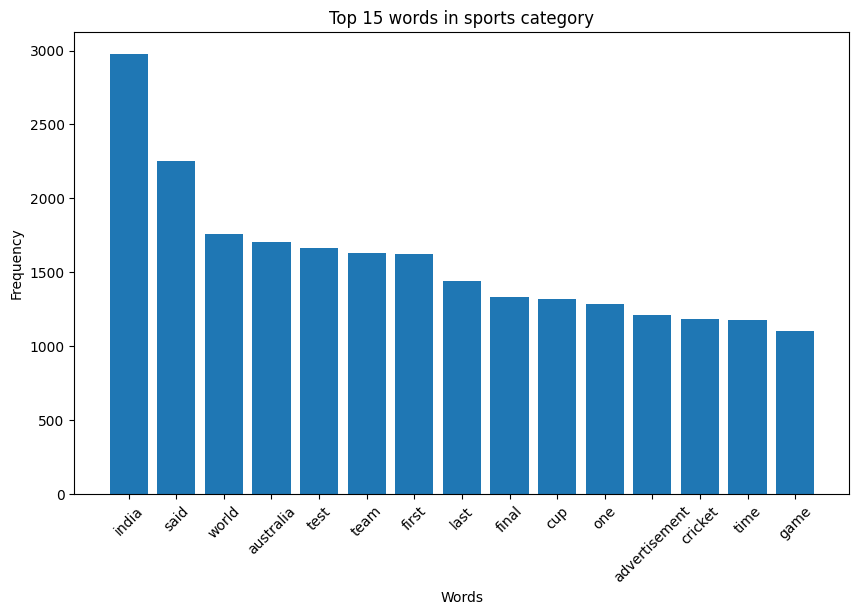

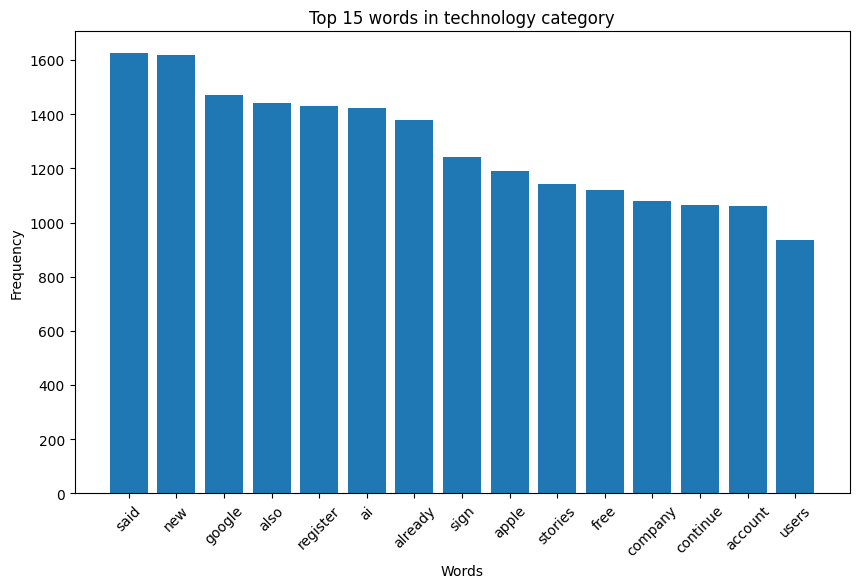

In [9]:
for name, group in df.groupby('category'):
    generate_bar_chart(group)